# Generate Dummy Data for Causal Graphs

This notebook contains code to generate synthetic data for testing the graph merging module.

## Using the DataGenerator Class

The `DataGenerator` class uses Google's Gemini API to generate causal graphs based on natural language queries. Let's see how to use it:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Import the DataGenerator class
import sys
sys.path.append('..')  # Add the parent directory to the Python path
from src.dummy_data import DataGenerator

/opt/homebrew/Caskroom/miniconda/base/envs/graph_merging/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
key=None
generator = DataGenerator(api_key=key)

### Example 1: Generate a Simple Causal Graph

Let's generate a causal graph for a simple relationship between exercise and health:

In [4]:
# Generate a graph with maximum depth of 3
exercise_health_graph = generator.generate_graph(
    query="Generate a causal graph showing how regular exercise affects physical and mental health",
    depth=3
)

# Display the generated graph
import json
print(json.dumps(exercise_health_graph, indent=2))

Raw response from model:
{"Regular Exercise": {"children": ["Improved Cardiovascular Health", "Reduced Stress Levels"], "description": "Engaging in regular physical activity"}, "Improved Cardiovascular Health": {"children": ["Lower Risk of Heart Disease", "Increased Energy Levels"], "description": "Improved heart function and blood circulation"}, "Reduced Stress Levels": {"children": ["Improved Mood", "Better Sleep Quality"], "description": "Lower levels of cortisol and improved stress response"}, "Lower Risk of Heart Disease": {"children": [], "description": "Decreased likelihood of developing heart disease"}, "Increased Energy Levels": {"children": [], "description": "Greater stamina and vitality"}, "Improved Mood": {"children": [], "description": "Reduced symptoms of anxiety and depression"}, "Better Sleep Quality": {"children": [], "description": "Improved sleep patterns and duration"}}


Attempting to parse response...
{
  "Regular Exercise": {
    "children": [
      "Improved Ca

### Example 2: Generate a More Complex Graph

Let's try a more complex example with a deeper graph:

In [5]:
# Generate a more complex graph
climate_graph = generator.generate_graph(
    query="Generate a causal graph showing the relationships between climate change, human activities, and environmental impacts",
    depth=5
)

# Display the generated graph
print(json.dumps(climate_graph, indent=2))

Raw response from model:
{"Human Activities": {"children": ["Greenhouse Gas Emissions", "Deforestation", "Pollution"], "description": "Activities performed by humans that impact the environment"}, "Greenhouse Gas Emissions": {"children": ["Global Warming", "Ocean Acidification"], "description": "Release of gases like CO2 and methane into the atmosphere"}, "Deforestation": {"children": ["Habitat Loss", "Increased CO2 levels"], "description": "Clearing of forests for various purposes"}, "Pollution": {"children": ["Water Contamination", "Air Pollution"], "description": "Introduction of harmful substances into the environment"}, "Global Warming": {"children": ["Melting Glaciers", "Sea Level Rise"], "description": "Increase in Earth's average temperature"}, "Ocean Acidification": {"children": ["Coral Bleaching", "Marine Ecosystem Disruption"], "description": "Decrease in ocean pH due to increased CO2 absorption"}, "Habitat Loss": {"children": ["Biodiversity Loss"], "description": "Destructi

### Saving Generated Graphs

We can save the generated graphs to JSON files for later use:

In [6]:
# Save the generated graphs
generator.save_graph(exercise_health_graph, path='../data/graphs', name='exercise_health')
generator.save_graph(climate_graph, path='../data/graphs', name='climate_change')

### Visualizing the Generated Graphs

Let's create a function to visualize the generated graphs using NetworkX:

In [7]:
def visualize_graph(graph_dict):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes and edges
    for node, data in graph_dict.items():
        G.add_node(node, description=data['description'])
        for child in data['children']:
            G.add_edge(node, child)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=2000, alpha=0.6)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', 
                          arrows=True, arrowsize=20)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title("Causal Graph Visualization")
    plt.axis('off')
    plt.show()

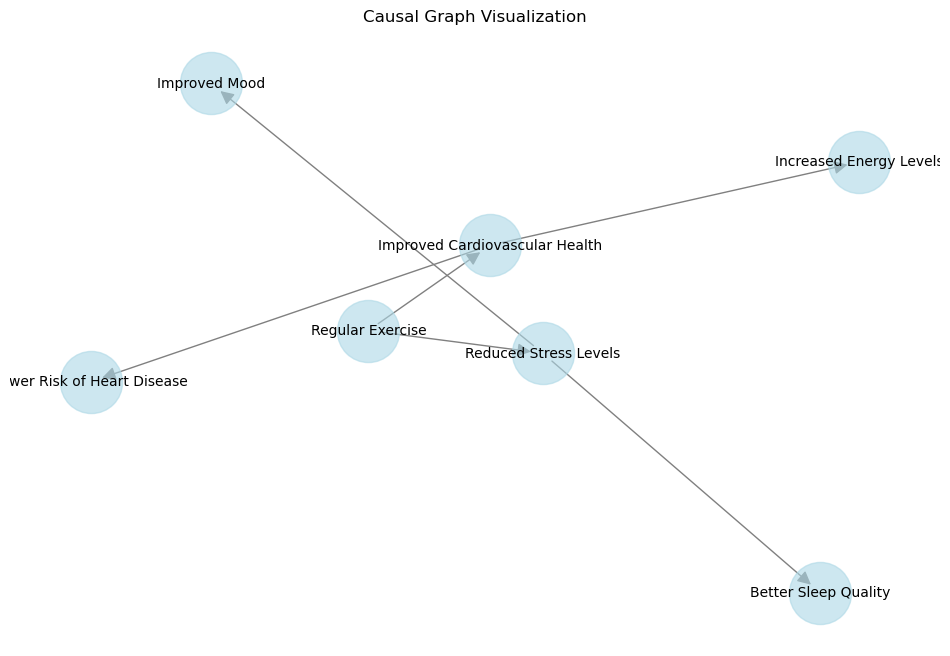

In [8]:
# Visualize the exercise and health graph
visualize_graph(exercise_health_graph)

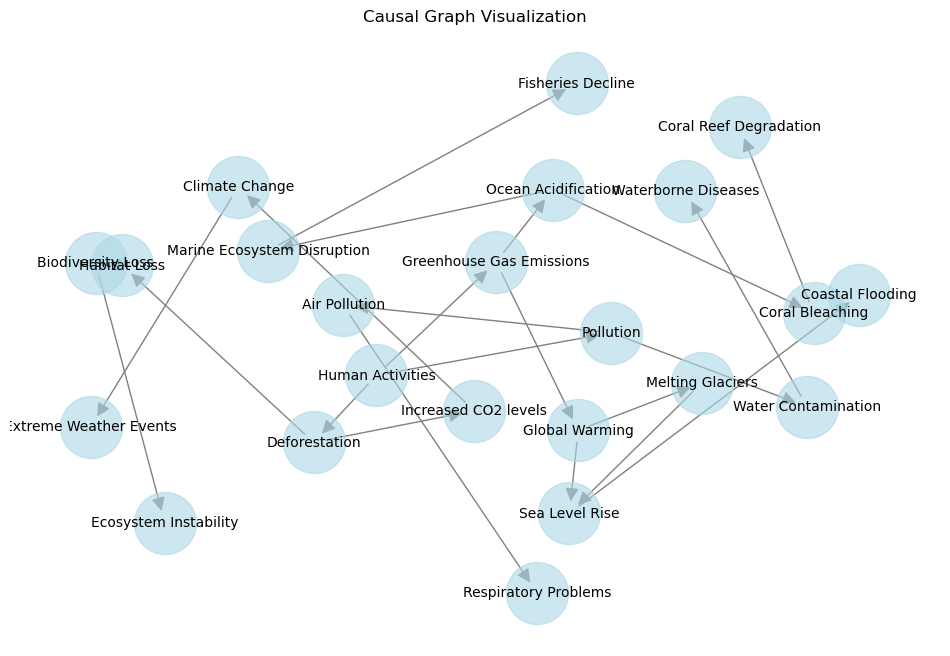

In [9]:
# Visualize the climate change graph
visualize_graph(climate_graph) 